<a href="https://colab.research.google.com/github/jessicamensah/creditcardapproval/blob/main/CMP7228_Machine_Learning_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Cleaning Data

In [ ]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
%matplotlib inline

Importing the CSV as raw data into Colab

In [ ]:
df = pd.read_csv('/content/application_record.csv')

Converting the labels from days to years and rounding the numbers for normalisation purposes

In [ ]:
df['DAYS_BIRTH'] = round(abs(df['DAYS_BIRTH']) / 365) # divide the days of birth by 365 to convert to years and 'abs' to convert into a positive number
df['DAYS_EMPLOYED'] = np.where(df['DAYS_EMPLOYED']==365243, 0, df['DAYS_EMPLOYED']) # replacing the values of 365243 with 0 = havent worked
df['DAYS_EMPLOYED'] = round(abs(df['DAYS_EMPLOYED']) / 365) # divide the days of employment by 365 to convert to years and 'abs' to convert into a positive number

Filling the IsNull Values with 'missing'

In [ ]:
df.isna().sum()

ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        134203
CNT_FAM_MEMBERS             0
dtype: int64

In [ ]:
# I treated the missing values
df['OCCUPATION_TYPE'] = df['OCCUPATION_TYPE'].fillna('missing')

In [ ]:
df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,33.0,12.0,1,1,0,0,missing,2
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,33.0,12.0,1,1,0,0,missing,2
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,59.0,3.0,1,0,0,0,Security staff,2
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.0,8.0,1,0,1,1,Sales staff,1
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.0,8.0,1,0,1,1,Sales staff,1


In [ ]:
df.shape

(438557, 18)

Label Encoding the data to normalise it

In [ ]:
# Label Encode the data
cols = ['CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS',
'NAME_HOUSING_TYPE','OCCUPATION_TYPE']

for i in cols:
  label_encoder = LabelEncoder()
  df[i] = label_encoder.fit_transform(df[i])

In [ ]:
df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,1,1,1,0,427500.0,4,1,0,4,33.0,12.0,1,1,0,0,18,2
1,5008805,1,1,1,0,427500.0,4,1,0,4,33.0,12.0,1,1,0,0,18,2
2,5008806,1,1,1,0,112500.0,4,4,1,1,59.0,3.0,1,0,0,0,16,2
3,5008808,0,0,1,0,270000.0,0,4,3,1,52.0,8.0,1,0,1,1,14,1
4,5008809,0,0,1,0,270000.0,0,4,3,1,52.0,8.0,1,0,1,1,14,1


In [ ]:
Dropping unnecassery columns

In [ ]:
df.drop(['ID', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL'],axis = 1, inplace = True)

Fixing The Outliers

In [ ]:

upper_limit_child = df['CNT_CHILDREN'].mean() + 3 * df['CNT_CHILDREN'].std()
upper_limit_income = df['AMT_INCOME_TOTAL'].mean() + 2.2 * df['AMT_INCOME_TOTAL'].std()
upper_limit_fam_members = df['CNT_FAM_MEMBERS'].mean() + 3 * df['CNT_FAM_MEMBERS'].std()
upper_limit_days_employed = df['DAYS_EMPLOYED'].mean() + 1.9 * df['DAYS_EMPLOYED'].std()

df = df.loc[df['CNT_CHILDREN'] <= upper_limit_child]
df = df.loc[df['AMT_INCOME_TOTAL'] <= upper_limit_income]
df = df.loc[df['CNT_FAM_MEMBERS'] <= upper_limit_fam_members]
df = df.loc[df['DAYS_EMPLOYED'] <= upper_limit_days_employed]

df

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,1,1,1,0,427500.0,4,1,0,4,33.0,12.0,18,2
1,1,1,1,0,427500.0,4,1,0,4,33.0,12.0,18,2
2,1,1,1,0,112500.0,4,4,1,1,59.0,3.0,16,2
3,0,0,1,0,270000.0,0,4,3,1,52.0,8.0,14,1
4,0,0,1,0,270000.0,0,4,3,1,52.0,8.0,14,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
438552,1,0,1,0,135000.0,1,4,2,1,62.0,0.0,18,1
438553,0,0,0,0,103500.0,4,4,3,1,44.0,8.0,8,1
438554,0,0,0,0,54000.0,0,1,3,5,22.0,1.0,14,1
438555,0,0,1,0,72000.0,1,4,1,1,59.0,0.0,18,2


Visualising the Data

<Axes: xlabel='AMT_INCOME_TOTAL'>

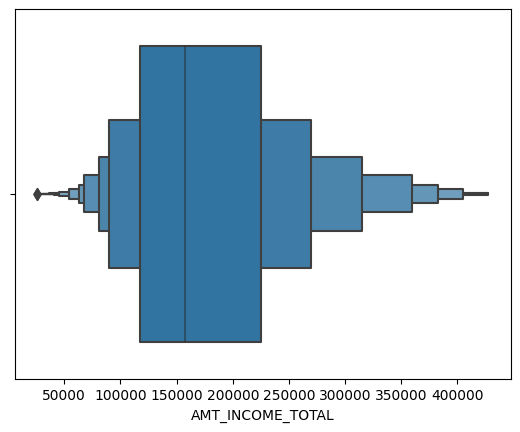

In [ ]:
sns.boxenplot(x='AMT_INCOME_TOTAL', data=df)

In [ ]:
df.head()

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,1,1,1,0,427500.0,4,1,0,4,33.0,12.0,18,2
1,1,1,1,0,427500.0,4,1,0,4,33.0,12.0,18,2
2,1,1,1,0,112500.0,4,4,1,1,59.0,3.0,16,2
3,0,0,1,0,270000.0,0,4,3,1,52.0,8.0,14,1
4,0,0,1,0,270000.0,0,4,3,1,52.0,8.0,14,1


<Axes: xlabel='DAYS_EMPLOYED', ylabel='AMT_INCOME_TOTAL'>

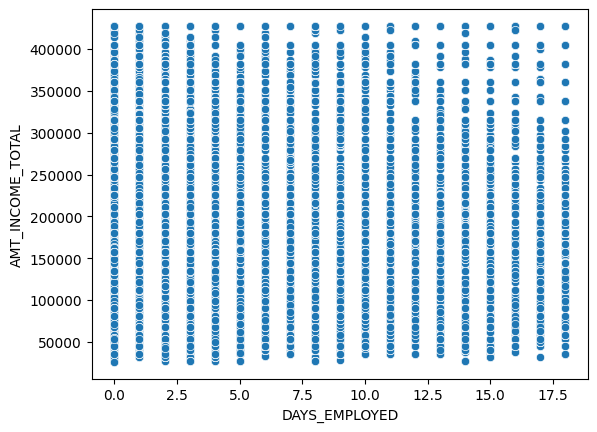

In [ ]:
sns.scatterplot(x='DAYS_EMPLOYED', y='AMT_INCOME_TOTAL', data=df)

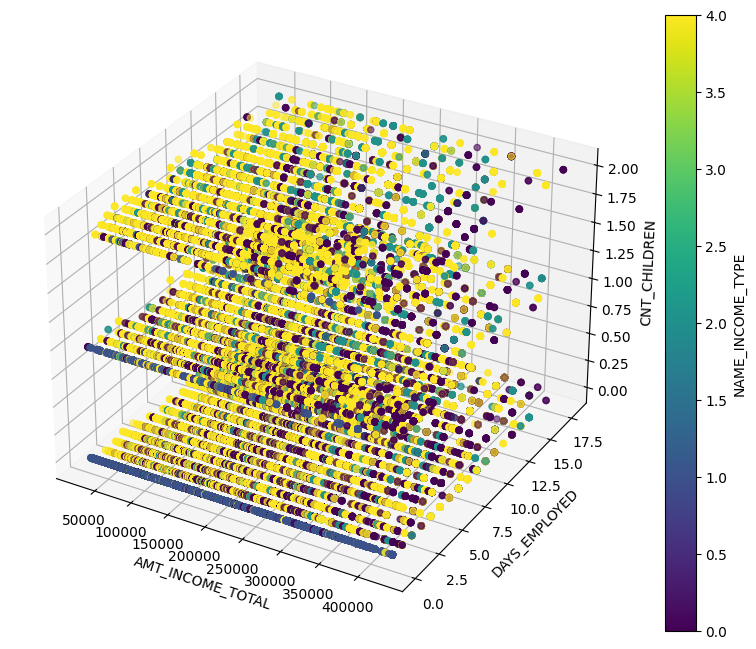

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

# Assuming df is your dataframe
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with color based on 'CODE_GENDER'
scatter = ax.scatter(df['AMT_INCOME_TOTAL'], df['DAYS_EMPLOYED'], df['CNT_CHILDREN'], s=20, c=df['NAME_INCOME_TYPE'], cmap='viridis', marker='o')

# Set labels
ax.set_xlabel('AMT_INCOME_TOTAL')
ax.set_ylabel('DAYS_EMPLOYED')
ax.set_zlabel('CNT_CHILDREN')

# Add color bar
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label('NAME_INCOME_TYPE')

# Show the plot
plt.show()

The data below is right skued meaning that there are many outliers

<Axes: xlabel='CODE_GENDER', ylabel='FLAG_OWN_CAR'>

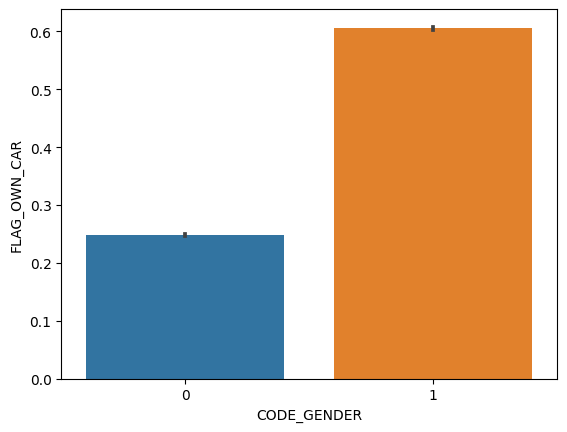

In [ ]:
sns.barplot(x='CODE_GENDER', y='FLAG_OWN_CAR', data=df)

<Axes: >

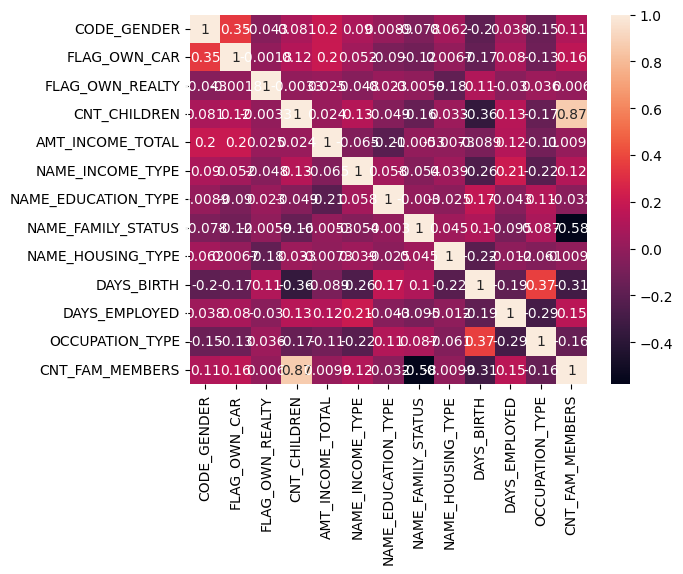

In [ ]:
sns.heatmap(df.corr(), annot=True)

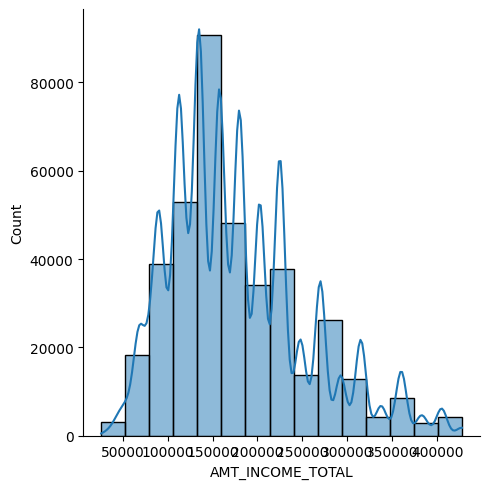

In [ ]:
sns.displot(df['AMT_INCOME_TOTAL'], kde=True, bins=15)

Proof of outliers z-score method

<Axes: xlabel='AMT_INCOME_TOTAL', ylabel='Density'>

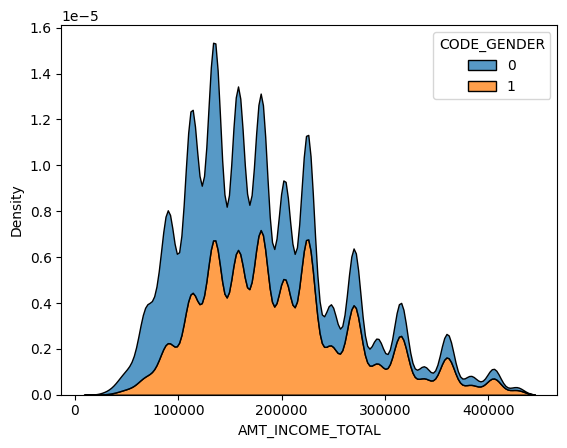

In [ ]:
sns.kdeplot(data=df, x='AMT_INCOME_TOTAL', hue='CODE_GENDER', multiple='stack', common_norm=False, common_grid=True, fill=True)

<Axes: xlabel='DAYS_EMPLOYED', ylabel='Count'>

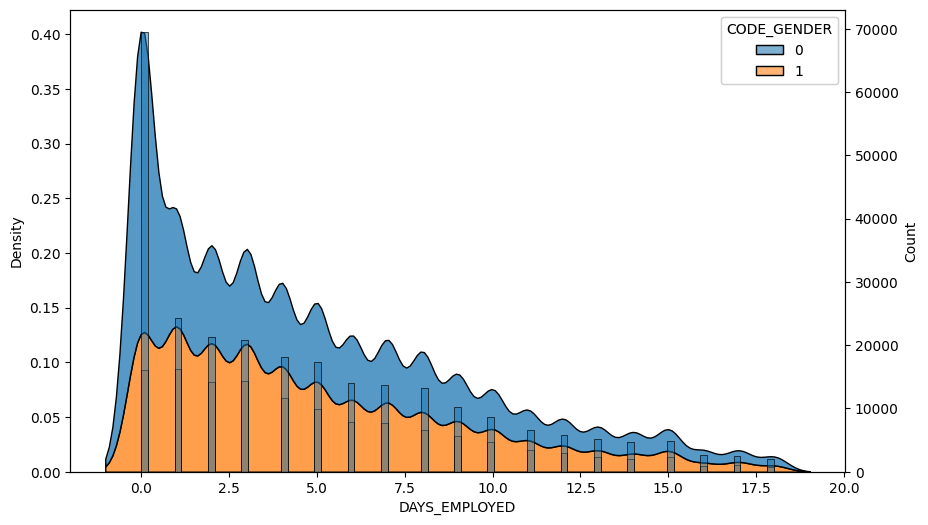

In [ ]:
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot KDE on the left y-axis
sns.kdeplot(data=df, x='DAYS_EMPLOYED', hue='CODE_GENDER', multiple='stack', common_norm=False, common_grid=True, fill=True, ax=ax1)

# Create a second y-axis for the histogram on the right
ax2 = ax1.twinx()
sns.histplot(x='DAYS_EMPLOYED', data=df, hue='CODE_GENDER', ax=ax2, alpha=0.5)


In [ ]:
df.head()

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,1,1,1,0,427500.0,4,1,0,4,33.0,12.0,18,2
1,1,1,1,0,427500.0,4,1,0,4,33.0,12.0,18,2
2,1,1,1,0,112500.0,4,4,1,1,59.0,3.0,16,2
3,0,0,1,0,270000.0,0,4,3,1,52.0,8.0,14,1
4,0,0,1,0,270000.0,0,4,3,1,52.0,8.0,14,1


Testing, Training and Splitting the data

In [ ]:
# split data into X and y
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import joblib

X = df[['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'CNT_FAM_MEMBERS','OCCUPATION_TYPE']]
Y = df['AMT_INCOME_TOTAL'] # target variable

X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.3, random_state=42)

print(len(X_train))
print(len(X_test))

277484
118922


In [ ]:
# Normalize the Data
scaler = StandardScaler()
X_train_nom = scaler.fit_transform(X_train)
X_test_nom = scaler.transform(X_test)

In [ ]:
X_train_nom

array([[ 1.42459351,  1.31411608, -1.49690577, ...,  0.78317894,
         2.19755781, -1.33156743],
       [ 1.42459351, -0.76096778, -1.49690577, ..., -0.29407402,
        -0.19013592, -1.33156743],
       [-0.70195462, -0.76096778,  0.66804472, ..., -0.29407402,
         1.00371095, -0.16616244],
       ...,
       [ 1.42459351, -0.76096778,  0.66804472, ..., -0.29407402,
        -0.19013592, -0.49913529],
       [-0.70195462, -0.76096778,  0.66804472, ..., -0.29407402,
        -0.19013592, -1.83102671],
       [ 1.42459351,  1.31411608, -1.49690577, ..., -0.29407402,
        -0.19013592, -0.83210814]])

The fitting and Prediction of the test and training data

In [ ]:
# Building Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train_nom, y_train)

LinearRegression()

In [ ]:
# Predict on the test
y_pred = lr_model.predict(X_test_nom)

In [ ]:
# Evaluate Linear Model
from sklearn.metrics import *

mean_squared_error(y_pred, y_test)

5129693964.583891

Linear Regression Outcome as a Scatter plot

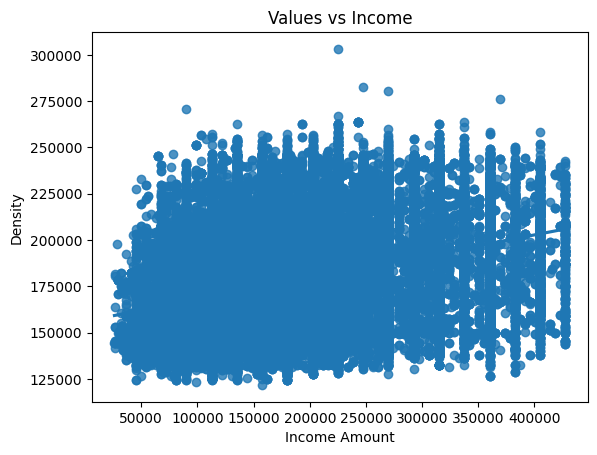

In [ ]:
import seaborn as sns

sns.regplot(x=y_test, y=y_pred)
plt.xlabel('Income Amount')
plt.ylabel('Density')
plt.title('Values vs Income')
plt.show()

Linear Regression as a Bar Plot regarding its Feature Importance

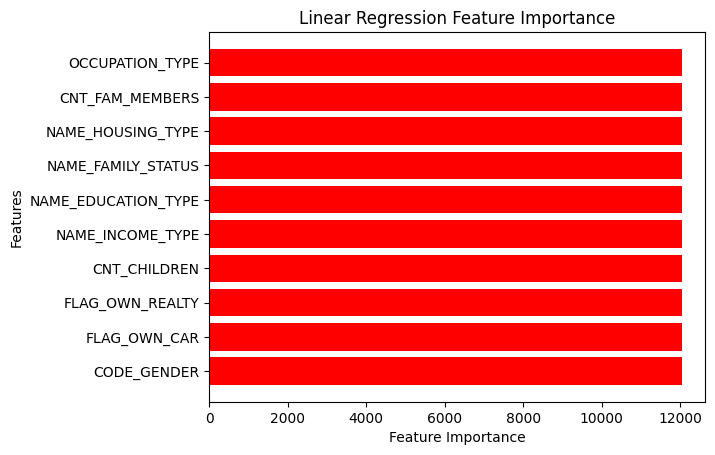

In [ ]:
plt.barh(X.columns, lr_model.coef_[0], color='red')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Linear Regression Feature Importance')
plt.show()

Fit and Prediction of Model

In [ ]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor()
xgb_model.fit(X_train_nom, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
# Predict on the test
xgb_y_pred = xgb_model.predict(X_test_nom)

Finding Mean Squared Error (accuracy score)

In [ ]:
# Evaluate XGB Model
from sklearn.metrics import *

mean_squared_error(xgb_y_pred, y_test)

4578062177.4044895

Identifying the Feature Impirtance when XGBoost is used

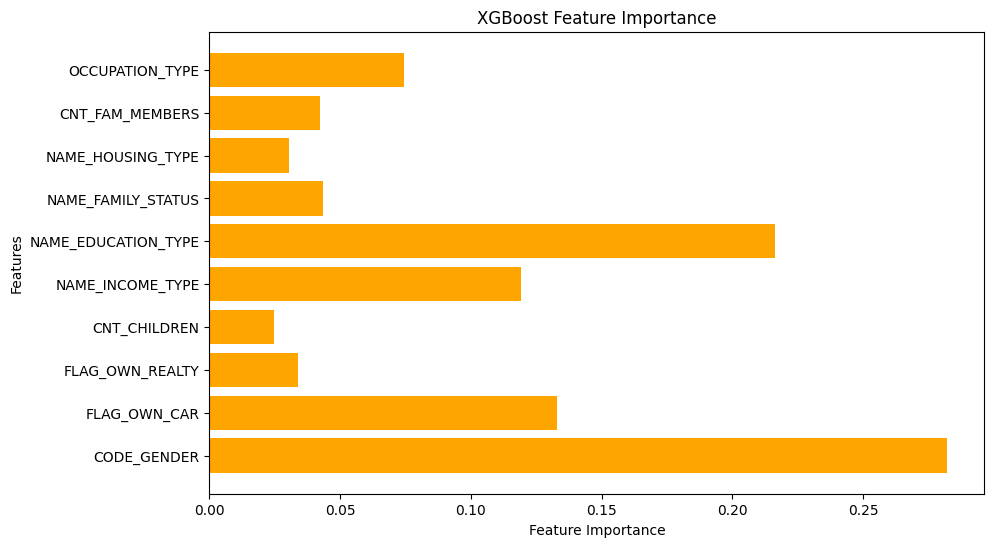

In [ ]:
# Plotting the feature importance for XGBoost
plt.figure(figsize=(10, 6))
plt.barh(X.columns, xgb_model.feature_importances_, color='ORANGE')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('XGBoost Feature Importance')
plt.show()

Scatterplot with lines of the income categories

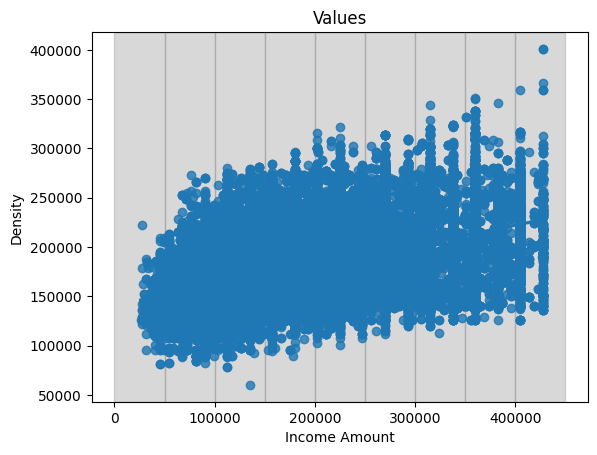

In [ ]:
import seaborn as sns

income_ranges = [(0, 50000), (50000, 100000), (100000, 150000), (150000, 200000), (200000, 250000), (250000, 300000), (300000, 350000), (350000, 400000), (400000, 450000)]  # Define income ranges
for income_range in income_ranges:
    plt.axvspan(income_range[0], income_range[1], alpha=0.3, color='gray')

sns.regplot(x=y_test, y=xgb_y_pred)
plt.xlabel('Income Amount')
plt.ylabel('Density')
plt.title('Values')
plt.show()

Train, Test Split of Decision Tree

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree

X = df[['CODE_GENDER', 'FLAG_OWN_CAR', 'AMT_INCOME_TOTAL', 'CNT_CHILDREN', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'CNT_FAM_MEMBERS','OCCUPATION_TYPE']] #other features
y = df['FLAG_OWN_REALTY'] # target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


Fit, Transform and Prediction of the Model

In [ ]:
# Normalize the Data
scaler = StandardScaler()
X_train_nom = scaler.fit_transform(X_train)
X_test_nom = scaler.transform(X_test)

In [ ]:
dt_model = DecisionTreeClassifier(max_depth=6)
dt_model.fit(X_train_nom, y_train)

DecisionTreeClassifier(max_depth=6)

In [ ]:
y_pred_dt = dt_model.predict(X_test_nom)

Testing of Accuracy Score

In [ ]:
accuracy_score(y_pred_dt, y_test)

0.7067405526311363

Decision Tree Output

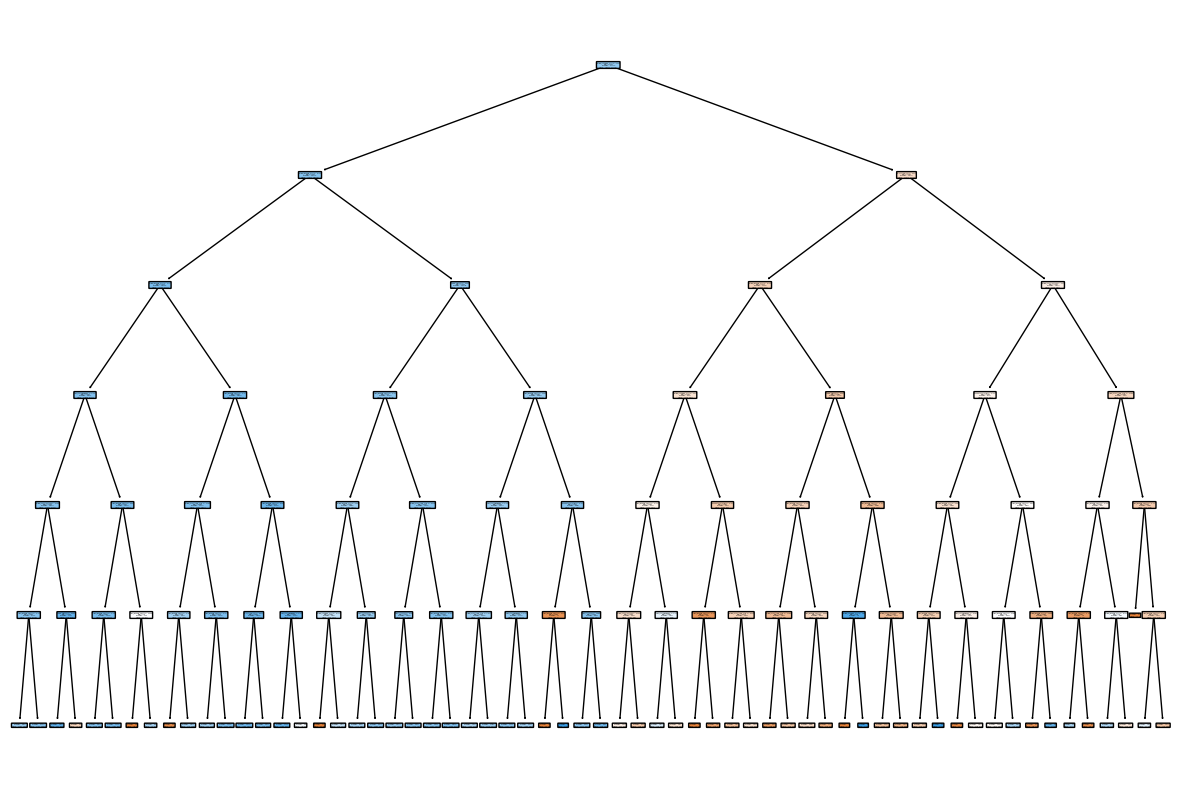

In [ ]:
plt.figure(figsize=(15, 10))
plot_tree(dt_model, filled=True, feature_names=X.columns, rounded=True)
plt.show()

Random Forest Fit and Prediction

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model.fit(X_train_nom, y_train)

RandomForestClassifier()

In [ ]:
y_pred_rf = rf_model.predict(X_test_nom)

Checking for the Accuracy Score of Model

In [ ]:
accuracy_score(y_pred_rf, y_test)

0.8177544945426414

Checking for Decision Tree changes

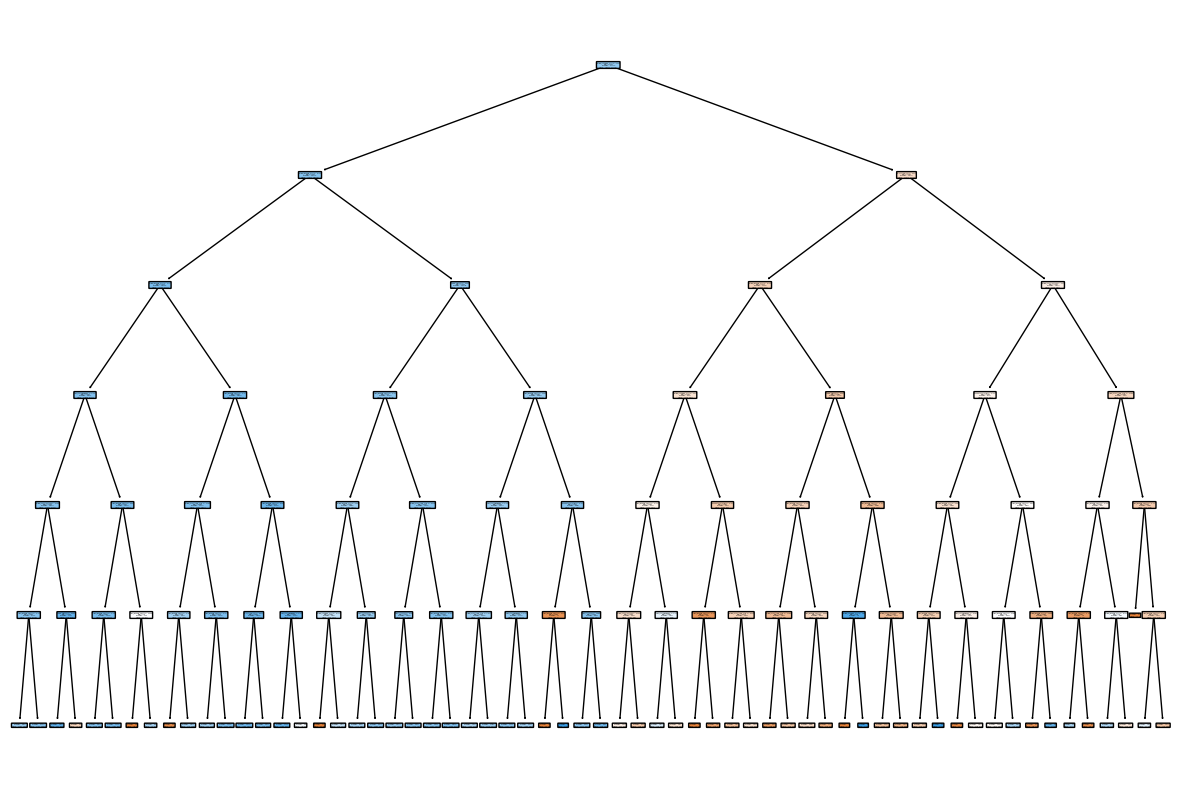

In [ ]:
plt.figure(figsize=(15, 10))
plot_tree(dt_model, filled=True, feature_names=X.columns, rounded=True)
plt.show()

Checking for Feature Importance with Random Forest

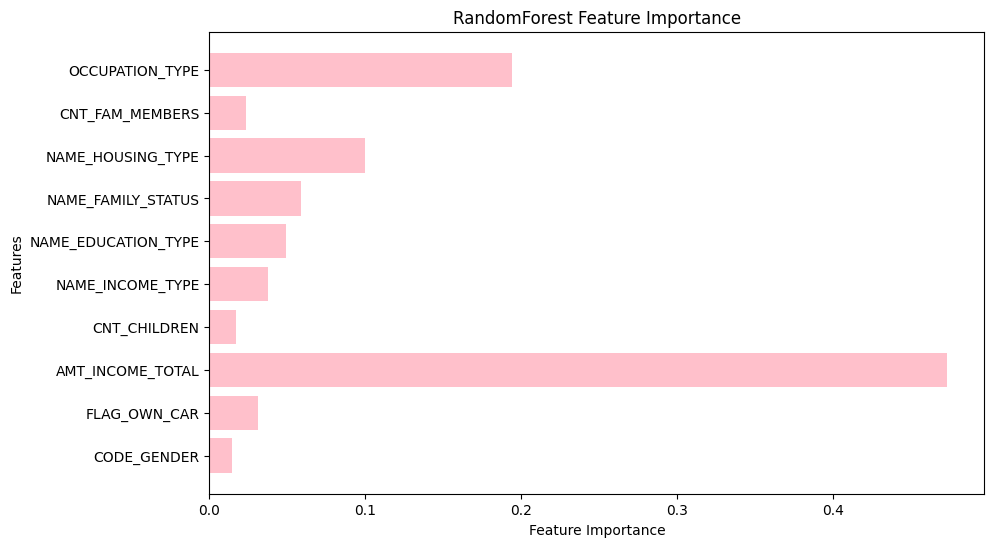

In [ ]:
# Plotting the feature importance for RandomForest
plt.figure(figsize=(10, 6))
plt.barh(X.columns, rf_model.feature_importances_, color='PINK')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('RandomForest Feature Importance')
plt.show() #if your income is high, you will own a house

Hierachal Clustering

In [ ]:
import scipy.cluster.hierarchy as sch
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt


Characteristics of the Hierarchal Cluster being added below

In [ ]:
df = make_blobs(n_samples = 200,
                n_features = 2,
                centers = 2,
                cluster_std = 1.6,
                random_state = 50)

In [ ]:
points = df[0]

In [ ]:
from sklearn.cluster import AgglomerativeClustering

Hierarchal Clustering Outcome

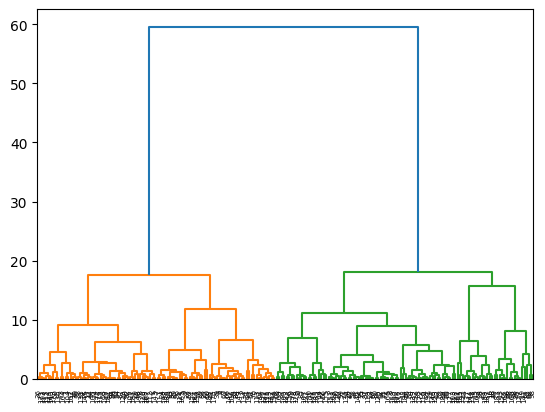

In [ ]:
dendogram = sch.dendrogram(sch.linkage(points, method='ward'))

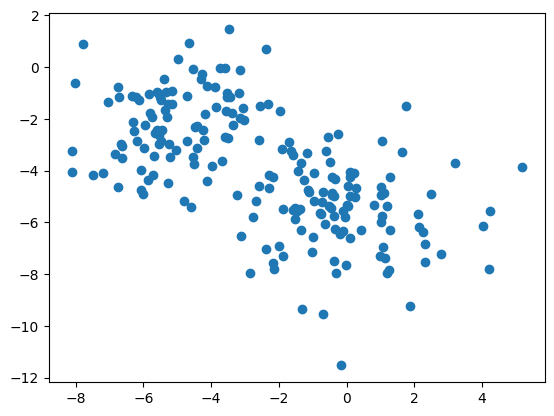

In [ ]:
plt.scatter(df[0][:,0], df[0][:,1])

In [ ]:
hc = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')

In [ ]:
y_hc = hc.fit_predict(points)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Hierarchal Clustering as a scatter plot

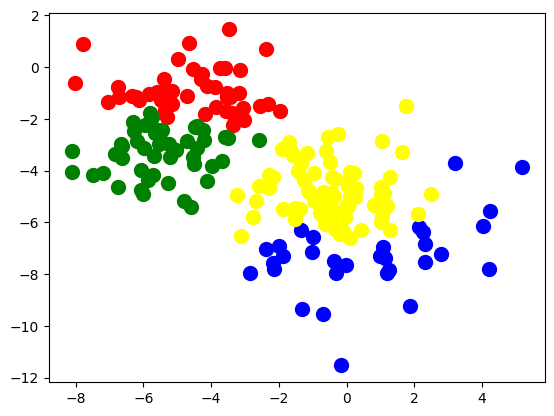

In [ ]:
plt.scatter(points[y_hc == 0, 0], points[y_hc == 0, 1], s=100, c= 'blue')
plt.scatter(points[y_hc == 1, 0], points[y_hc == 1, 1], s=100, c= 'red')
plt.scatter(points[y_hc == 2, 0], points[y_hc == 2, 1], s=100, c= 'yellow')
plt.scatter(points[y_hc == 3, 0], points[y_hc == 3, 1], s=100, c= 'green')


Silhouette Score to check the accuracy of the model

In [ ]:
silhouette_avg = silhouette_score(points, y_hc)
print("Silhouette Score:", silhouette_avg)

plt.show()

Silhouette Score: 0.3402099507380042


Hierarchal Clustering with 2 clusters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


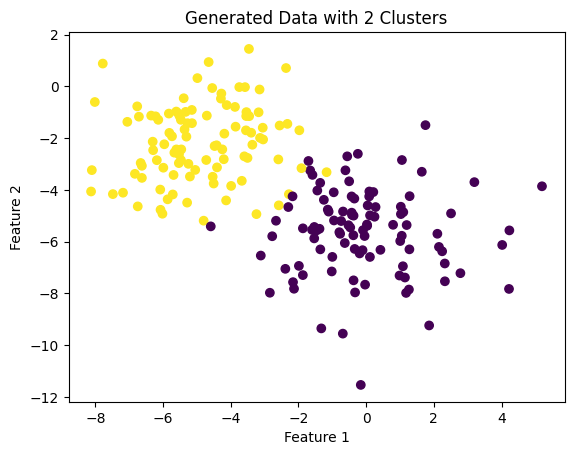

In [ ]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# Create 2 clusters
df = make_blobs(n_samples=200,
                n_features=2,
                centers=2,
                cluster_std=1.6,
                random_state=50)

hc2 = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
y_hc2 = hc.fit_predict(points)

# Scatter plot to visualize the clusters
plt.scatter(df[0][:, 0], df[0][:, 1], c=df[1], cmap='viridis')
plt.title('Generated Data with 2 Clusters')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


In [ ]:
silhouette_avg = silhouette_score(points, y_hc2)
print("Silhouette Score:", silhouette_avg)

plt.show()

Silhouette Score: 0.3402099507380042


K Means Clustering

In [ ]:
df = make_blobs(n_samples = 200,
                n_features = 2,
                centers = 4,
                cluster_std = 1.6,
                random_state = 50)

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
kmeans = KMeans(n_clusters=4)

In [ ]:
kmeans.fit(points)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

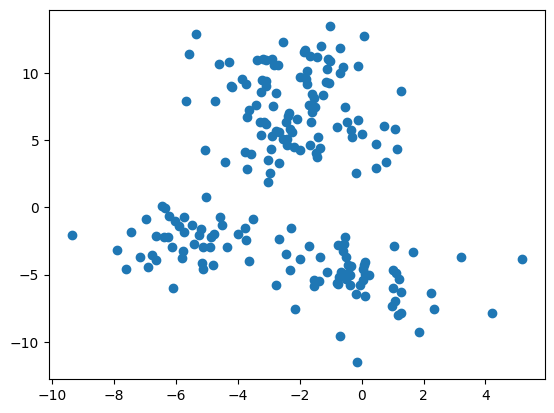

In [ ]:
plt.scatter(df[0][:,0], df[0][:,1])

In [ ]:
clusters = kmeans.cluster_centers_

In [ ]:
print(clusters)

[[ 1.56674795 -6.94588046]
 [-4.32895062 -1.14890553]
 [-0.84159612 -4.98936102]
 [-5.84711214 -3.27698851]]


In [ ]:
y_km = kmeans.fit_predict(points)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Scatterplot for KMeans

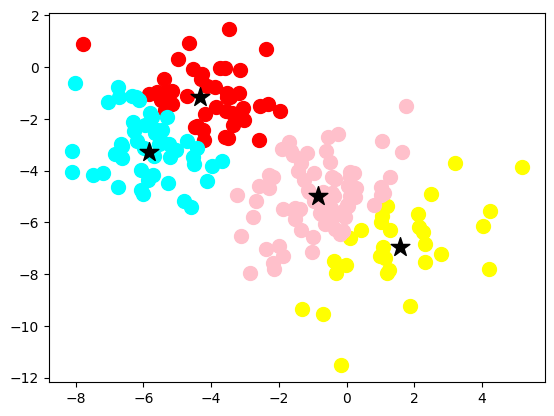

In [ ]:
plt.scatter(points[y_km == 0, 0], points[y_km == 0, 1], s=100, c='yellow', label='Customer type 0')
plt.scatter(points[y_km == 1, 0], points[y_km == 1, 1], s=100, c='red', label='Customer type 1')
plt.scatter(points[y_km == 2, 0], points[y_km == 2, 1], s=100, c='pink', label='Customer type 2')
plt.scatter(points[y_km == 3, 0], points[y_km == 3, 1], s=100, c='cyan', label='Customer type 3')


plt.scatter(clusters[0][0], clusters[0][1], marker='*', s=200, c= 'black')
plt.scatter(clusters[1][0], clusters[1][1], marker='*', s=200, c= 'black')
plt.scatter(clusters[2][0], clusters[2][1], marker='*', s=200, c= 'black')
plt.scatter(clusters[3][0], clusters[3][1], marker='*', s=200, c= 'black')

In [ ]:
silhouette_avg = silhouette_score(points, y_km)
print("Silhouette Score:", silhouette_avg)

plt.show()

Silhouette Score: 0.35850039822200275
